In [1]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets

Loading the dataset

In [2]:
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

Considering the first 2 features

In [6]:
x = iris['data'][:,:2]
X = pd.DataFrame(x)
X.head()

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


[]

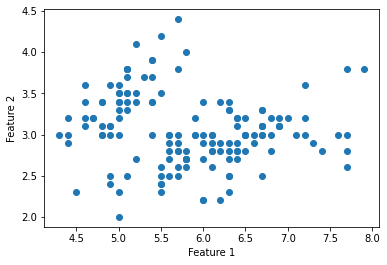

In [8]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.plot()

Building the model

In [9]:
#For random initialization of centroids
np.random.seed(42)
centroid = (X.sample(n=3))
centroid

,0,1
73,6.1,2.8
18,5.7,3.8
118,7.7,2.6


In [10]:
#Euclidiean distance
def euclidean_distance(x1,x2):
  return(np.sqrt(np.sum((x1-x2)**2,axis = 1)))

In [11]:
class KMeansCluster:
  def __init__(self, X, num_clusters):
    self.k = num_clusters
    self.max_iterations = 100
    self.num_examples = X.shape[0]
    self.num_columns = X.shape[1]

  def initialize_centroids(self, X):  # Initializing random centroids
    centroids = np.zeros((self.k, self.num_columns))
    for k in range(self.k):
      centroid = X[np.random.choice(range(self.num_examples))]
      centroids[k] = centroid
    return(centroids)

  def create_clusters(self, X, centroids):
    # Cordinates of each cluster
    clusters = [[] for _ in range(self.k)]

    # Cluster reassigning
    for point_index, point in enumerate(X):
      new_centroid = np.argmin(euclidean_distance(point, centroid))
      clusters[new_centroid].append(point_index)
    return(clusters)

  def calculate_new_centroids(self, clusters, X):  # reassigning of centroid of updated cluster
    centroids = np.zeros((self.k, self.num_columns))
    for index, cluster in enumerate(clusters):
      new_centroid = np.mean(X[cluster], axis=0)
      centroids[index] = new_centroid
    return(centroids)

  def predict_cluster(self, clusters, X):
    y_pred = np.zeros(self.num_examples)

    for cluster_index, cluster in enumerate(clusters):
      for sample_index in cluster:
        y_pred[sample_index] = cluster_index
    return(y_pred)

  def fit(self, X):
    centroids = self.initialize_centroids(X)
    for it in range(self.max_iterations):
      clusters = self.create_clusters(X, centroids)
      previous_centroids = centroids
      centroids = self.calculate_new_centroids(clusters, X)
      diff = centroids - previous_centroids

      if not diff.any(): # if there is no change in coordinates of centroids, we break the loop 
        print("Terminating after {}th iteration as there is no futher change in centroids.".format(it+1))
        break
    y_pred = self.predict_cluster(clusters, X)
    return(y_pred, centroids)

Using the model for clustering among first 2 features of iris dataset.

In [12]:
k = 3
x = np.array(x)
model = KMeansCluster(x, k)
y_pred,centroids = model.fit(x)
y_pred

Terminating after 2th iteration as there is no futher change in centroids.


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 2., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 2.,
       0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 2., 2., 2., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
centroids

array([[6.06896552, 2.82068966],
       [5.036     , 3.45      ],
       [7.43846154, 3.13076923]])

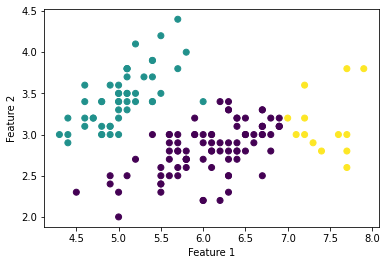

In [15]:
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
X['predictions'] = y_pred
df0 = X[X['predictions']==0]
df1 = X[X['predictions']==1]
df2 = X[X['predictions']==2]

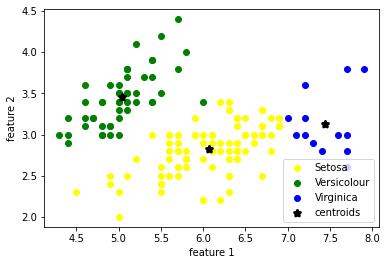

In [17]:
plt.scatter(df0.iloc[:,0],df0.iloc[:,1],color = 'yellow',label = 'Setosa')
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],color = 'green', label = 'Versicolour')
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],color = 'blue', label = 'Virginica')
plt.scatter(centroids[:,0],centroids[:,1],label = 'centroids',marker = '*',color = 'black',linewidths=3)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

Using the same model for feature 2 and 3

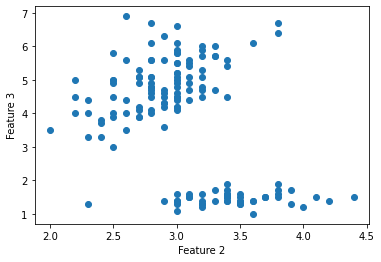

In [19]:
x = iris.data[:,1:3]
x = np.array(x)
plt.scatter(x[:,0],x[:,1])
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.show()

In [20]:
model = KMeansCluster(x, 3)
y_pred,centroids = model.fit(x)
y_pred

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

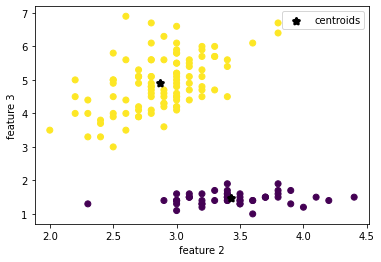

In [21]:
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.scatter(centroids[:,0],centroids[:,1],label = 'centroids',marker = '*',color = 'black',linewidths=3)
plt.xlabel('feature 2')
plt.ylabel('feature 3')
plt.legend()
plt.show()
plt.show()

Model using KMeans

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)

In [23]:
x = iris['data'][:,:2]
X = pd.DataFrame(x)
y_pred = km.fit_predict(x)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [24]:
km.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [25]:
X['predictions'] = y_pred
X.head()

,0,1,predictions
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [26]:
df0 = X[X['predictions']==0]
df1 = X[X['predictions']==1]
df2 = X[X['predictions']==2]


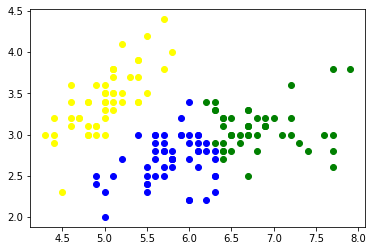

In [27]:
plt.scatter(df0.iloc[:,0],df0.iloc[:,1],color = 'yellow')
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],color = 'green')
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],color = 'blue')
plt.show()

Plot with centroids

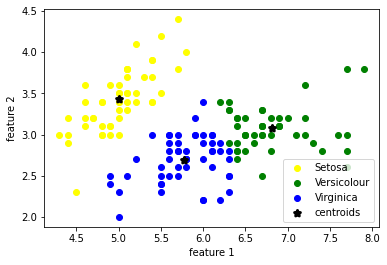

In [28]:
plt.scatter(df0.iloc[:,0],df0.iloc[:,1],color = 'yellow',label = 'Setosa')
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],color = 'green', label = 'Versicolour')
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],color = 'blue', label = 'Virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label = 'centroids',marker = '*',color = 'black',linewidths=3)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

In [29]:
# Calculating sum of squared error of the distances
km.inertia_

37.05070212765958

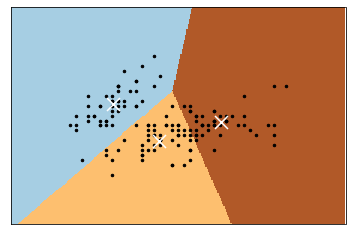

In [30]:
#plotting decision boundaries
kmeans = KMeans(n_clusters=3)
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
X = iris.data
Y = iris.target
kmeans.fit(X[:,:2],Y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
       cmap=plt.cm.Paired,
       aspect='auto', origin='lower')

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Choosing appropriate value for k

In [31]:
sse = [] #stores sum of square error
for k in range(1,8):
  km = KMeans(n_clusters=k)
  km.fit(iris.data)
  sse.append(km.inertia_)

[]

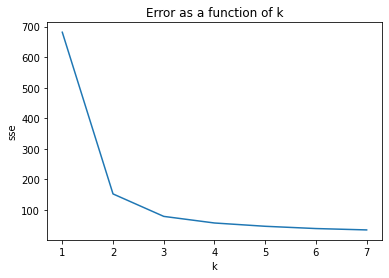

In [32]:
plt.plot(list(range(1,8)),sse)
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Error as a function of k')
plt.plot()